In [2]:
# Imports for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [3]:
# Setting paths using pathlib

data_path = Path("data/")
target_path = data_path / "train.csv"
inputs_directory_path = data_path / "train"

In [4]:
# Loading the target data
target_data = pd.read_csv(target_path)

# Display the first few rows of the target data
target_data.head()

,ImageID,distance,location
0,0,351,"[215, 158]"
1,1,372,"[228, 269]"
2,2,488,"[255, 386]"
3,3,308,"[306, 426]"
4,4,67,"[248, 338]"


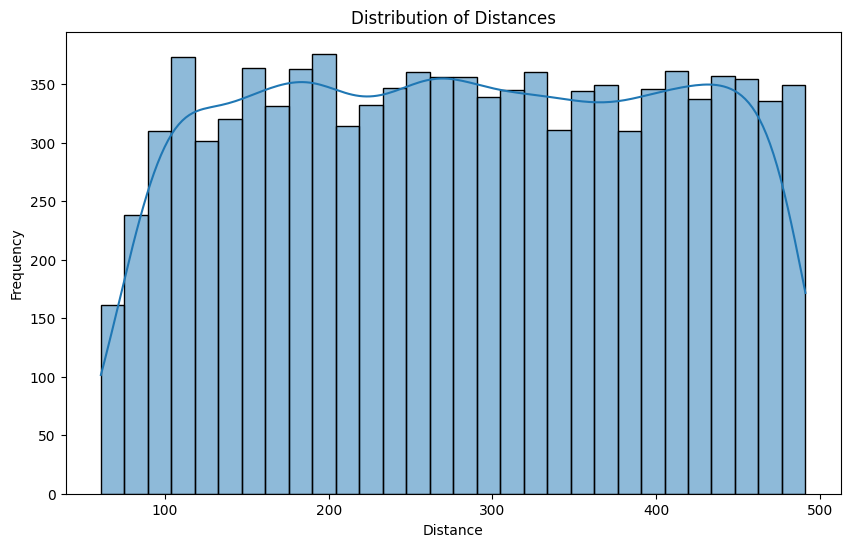

In [5]:
# Create histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(target_data['distance'], bins=30, kde=True)
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

/var/folders/9t/rr1jg6x166j40yl1_5glmj7c0000gn/T/ipykernel_89243/2203287983.py:37: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter([x], [y], c=[distance], cmap='viridis', s=300, marker='x',


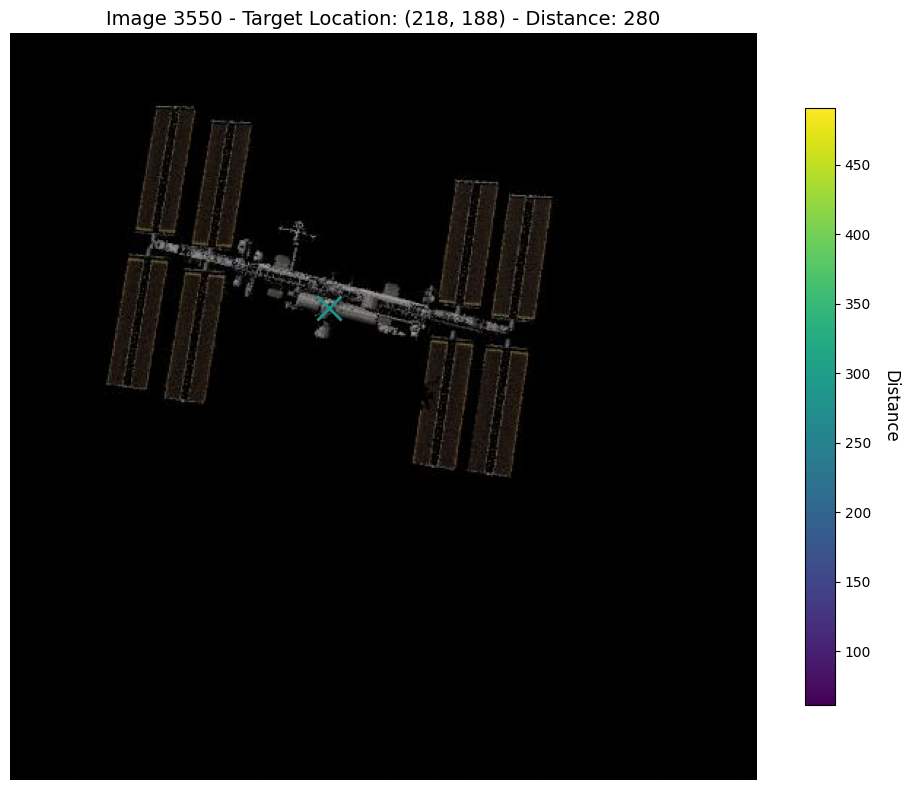

In [33]:
# Load an input image
image_id = 3550
input_image_path = inputs_directory_path / f"{image_id}.jpg"
input_image = plt.imread(input_image_path)

# Get the corresponding target data
target_data_row = target_data[target_data['ImageID'] == image_id]

# Display the location in the target data as a colored crosshair on the image
if not target_data_row.empty:
    # Extract coordinates from the location column
    location = target_data_row['location'].values[0]
    distance = target_data_row['distance'].values[0]
    
    # Parse the location string to extract x, y coordinates
    if isinstance(location, str):
        # Remove brackets and split by comma
        location = location.strip('[]').split(', ')
        x, y = int(location[0]), int(location[1])
    else:
        # If it's already a list
        x, y = location[0], location[1]
    
    # Create a colormap based on distance
    # Get min and max distances for normalization
    min_distance = target_data['distance'].min()
    max_distance = target_data['distance'].max()
    
    # Normalize distance to 0-1 range for colormap
    normalized_distance = (distance - min_distance) / (max_distance - min_distance)
    
    # Create figure with colorbar
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(input_image)
    
    # Create scatter plot with color based on distance
    scatter = ax.scatter([x], [y], c=[distance], cmap='viridis', s=300, marker='x', 
                        vmin=min_distance, vmax=max_distance, edgecolors='white', linewidths=2)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
    cbar.set_label('Distance', rotation=270, labelpad=20, fontsize=12)
    
    ax.set_title(f'Image {image_id} - Target Location: ({x}, {y}) - Distance: {distance}', fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()